In [21]:
import numpy as np
import pandas as pd
import math


In [22]:
nse_df = pd.read_csv("data/NSE-StockHistory.csv")

In [23]:
yearly_data = nse_df.drop(columns=nse_df.columns[0], axis=1)


In [24]:
ticker_set = set()  # Create an empty ticker set that will hold all the tickers from 2000 to 2024
for year in range(2002,2024):
    for ticker in nse_df[str(year)].values:
        if isinstance(ticker, str):
            ticker_set.add(ticker.strip())    

In [25]:
ticker_set = sorted(ticker_set)

In [26]:
years = [year in range(2002,2024)]

In [27]:
years = list(range(2002, 2025))  

In [28]:
symb_mapping = pd.read_csv("data/ticker-companyname-mapping.csv", names=['ticker','company_name'])

In [29]:
list(nse_df['2002'].head(2))

['ACC.NS', 'BAJAJ-AUTO.NS']

In [30]:
pd.set_option('display.max_rows', None)

symb_mapping

,ticker,company_name
0,ABB.NS,ABB India Limited
1,ACC.NS,ACC Limited
2,ADANIENT.NS,Adani Enterprises Limited
3,ADANIPORTS.NS,Adani Ports and Special Economic Zone Limited
4,AMBUJACEM.NS,Ambuja Cements Limited
5,APOLLOHOSP.NS,Apollo Hospitals Enterprise Limited
6,ASIANPAINT.NS,Asian Paints Limited
7,AUROPHARMA.NS,Aurobindo Pharma Limited
8,AXISBANK.NS,Axis Bank Limited
9,BAJAJ-AUTO.NS,Bajaj Auto Limited


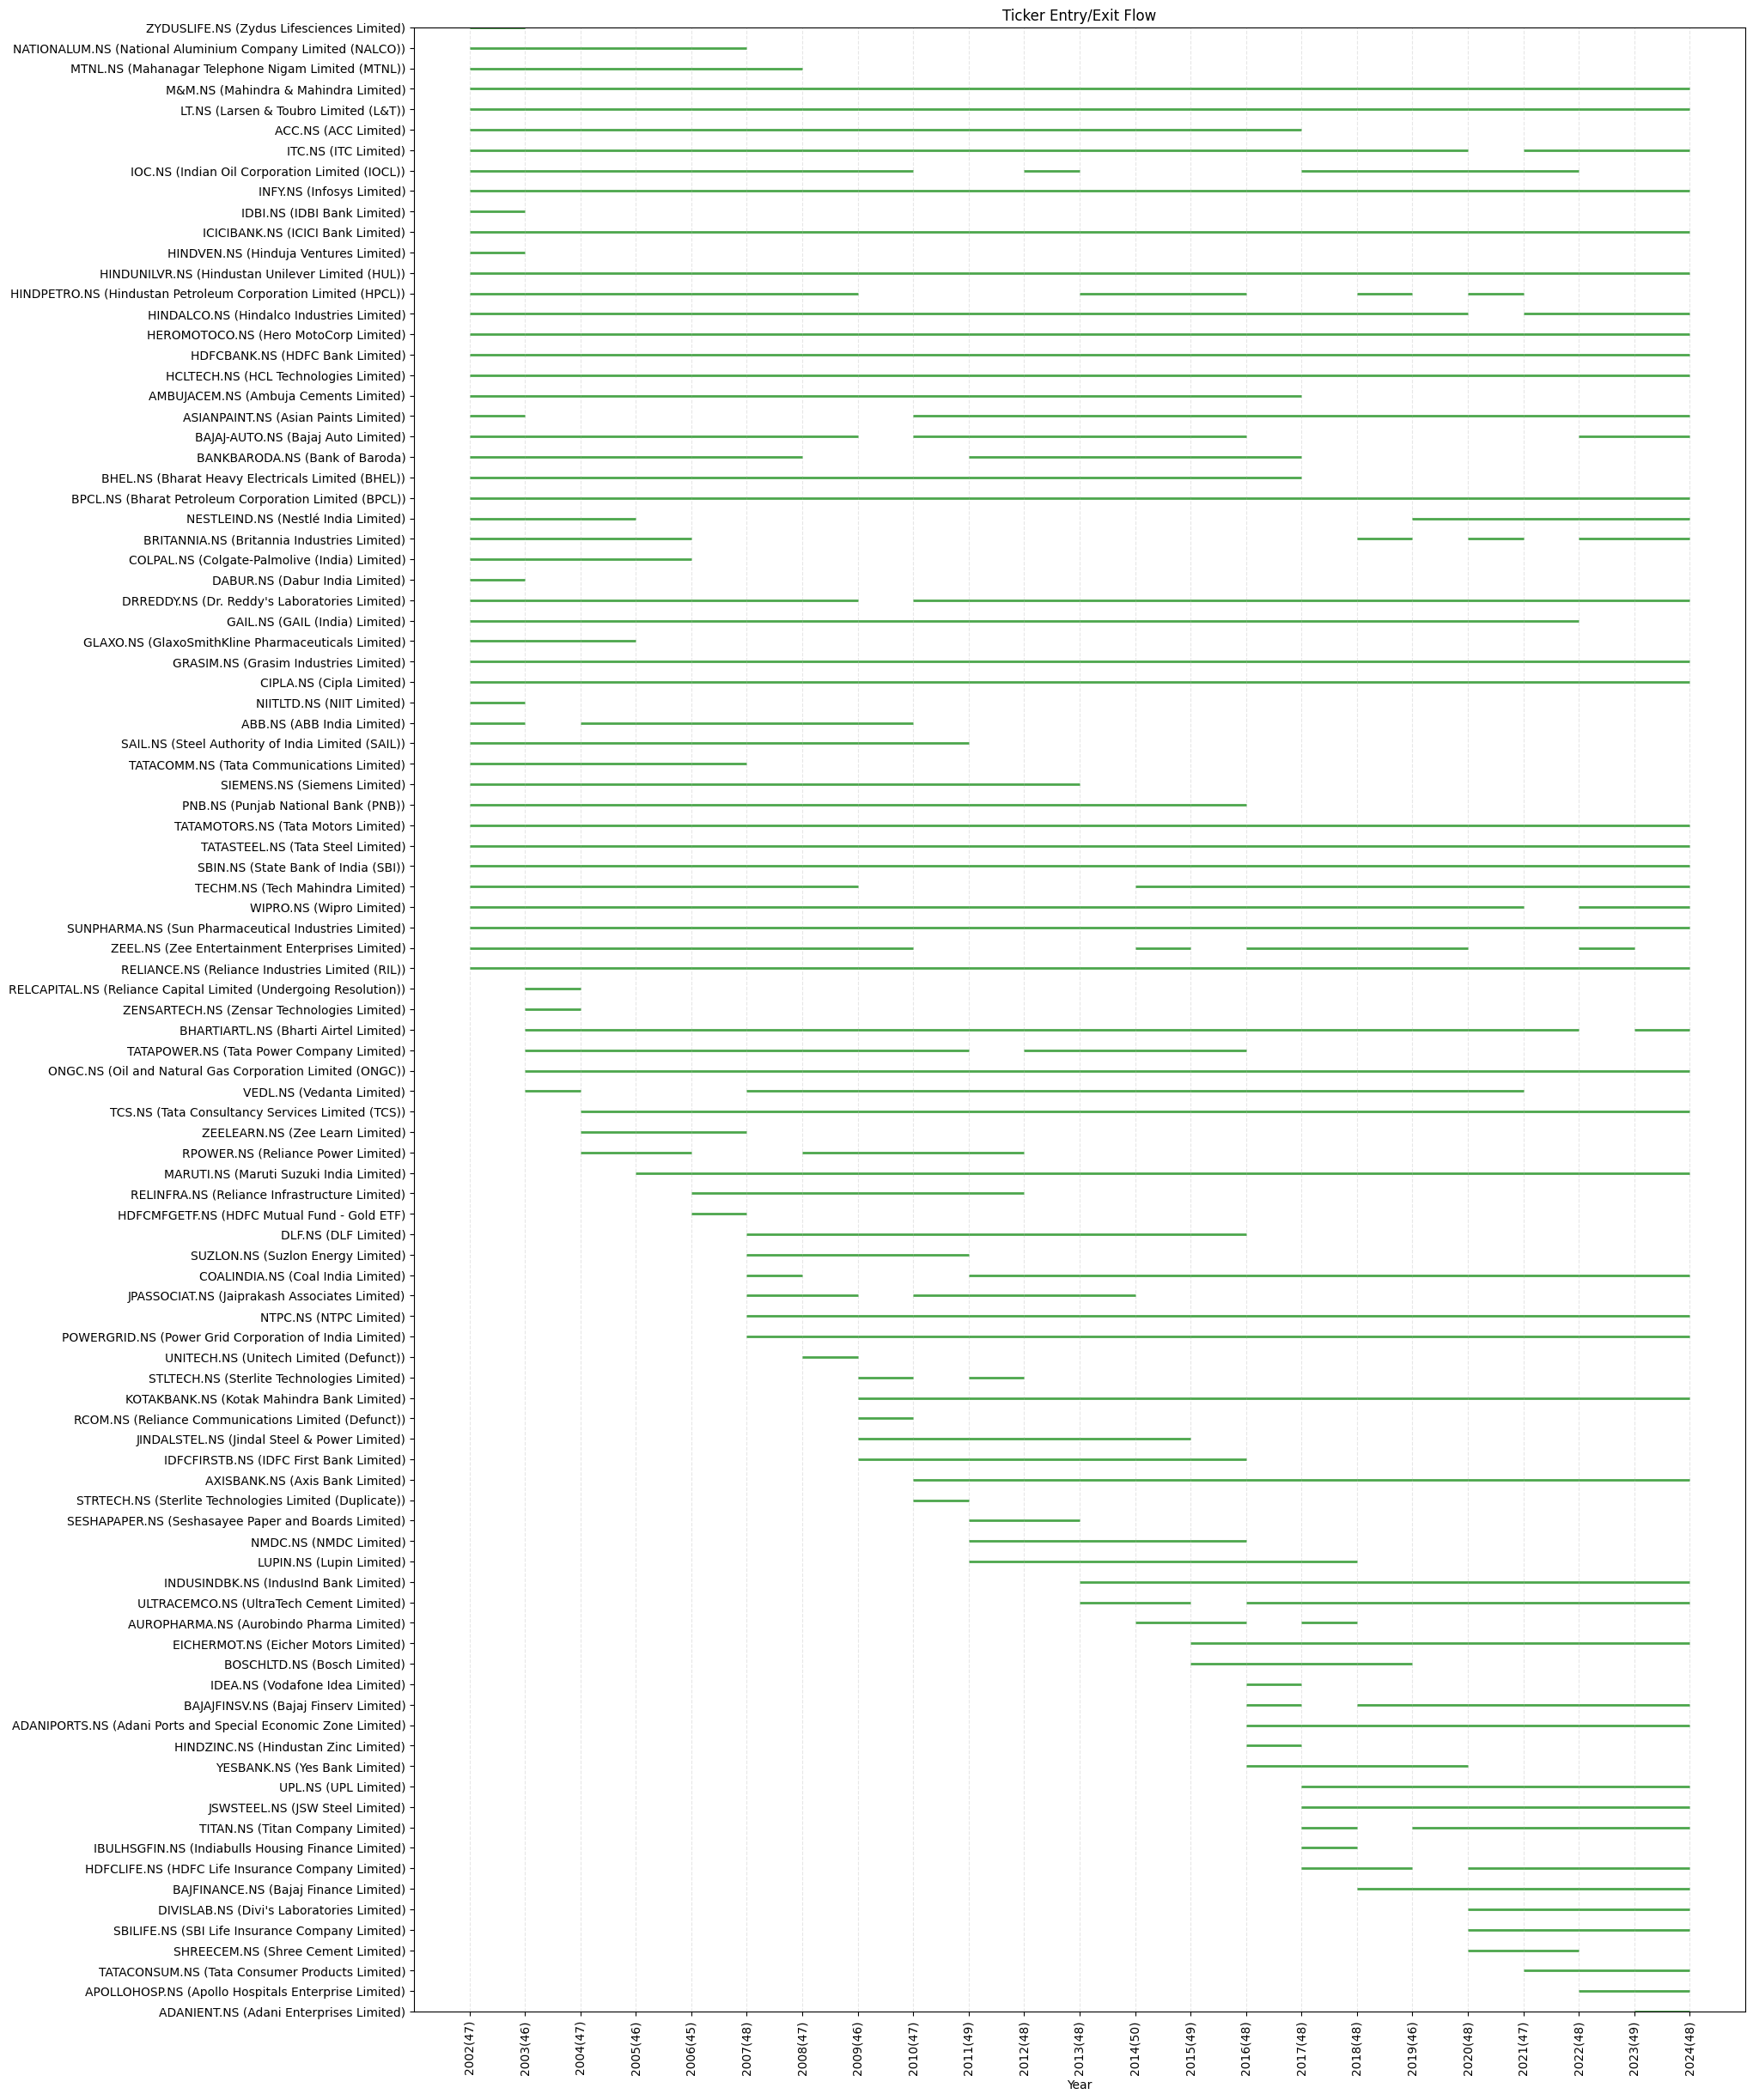

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Sample data preparation
# symb_mapping = pd.DataFrame({
#     'ticker': ['ABB.NS', 'ACC.NS', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS'],
#     'company_name': ['ABB India', 'ACC Ltd', 'Reliance', 'TCS', 'HDFC Bank']
# })

# Create proper yearly presence data (1=present, 0=absent)
# years = [2000, 2005, 2010, 2020, 2024]
all_tickers = symb_mapping['ticker'].unique()

# Initialize presence DataFrame
presence = pd.DataFrame(0, index=all_tickers, columns=years)

# Fill presence data based on your actual yearly_data
# yearly_data = {
#     2000: ['ABB.NS', 'ACC.NS', 'RELIANCE.NS'],
#     2005: ['ABB.NS', 'ACC.NS', 'RELIANCE.NS', 'TCS.NS'],
#     2010: ['ABB.NS', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS'],
#     2020: ['ABB.NS', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS'],
#     2024: ['ABB.NS', 'ACC.NS', 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
# }


# yearly_data = {
#     2000: list(nse_df['2000']),
#     2005: list(nse_df['2005']),
#     2010: list(nse_df['2010']),
#     2020: list(nse_df['2020']),
#     2024: list(nse_df['2024'])
# }

yearly_data = {
    int(year): list(nse_df[str(year)].dropna())  # Convert year to int, remove NaN values
    for year in nse_df.columns 
    if str(year).isdigit()  # Only process numeric columns (years)
}


for year in years:
    present_tickers = yearly_data.get(year, [])
    presence.loc[presence.index.isin(present_tickers), year] = 1

# Merge with company names
presence = presence.merge(
    symb_mapping.set_index('ticker'),
    left_index=True,
    right_index=True,
    how='left'
)

# Calculate first appearance year
first_appearance = presence[years].idxmax(axis=1)
ticker_order = first_appearance.sort_values(ascending=False).index

# Plotting
fig, ax = plt.subplots(figsize=(20, 30))

for i, ticker in enumerate(ticker_order):
    y = [i] * len(years)
    active = presence.loc[ticker, years].values.astype(bool)
    
    # Create line segments only for active periods
    segments = np.array([years, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([segments[:-1], segments[1:]], axis=1)
    lc = LineCollection(
        segments[active[:-1]],  # Only draw where active
        colors='green',
        linewidths=2,
        alpha=0.7
    )
    ax.add_collection(lc)

    
    # Mark entry points
    # if first_appearance[ticker] == years[0]:
    #     entry_year = years[0]
    # else:
    #     prev_year = years[years.index(first_appearance[ticker])-1]
    #     if not presence.loc[ticker, prev_year]:
    #         entry_year = first_appearance[ticker]
    #         ax.text(entry_year, i, "↑", ha='center', color='blue', fontsize=12)
    
    # # Mark exit points
    # last_year = presence.loc[ticker, years].idxmax()
    # if last_year != years[-1] and not presence.loc[ticker, years[years.index(last_year)+1]]:
    #     ax.text(last_year, i, "↓", ha='center', color='red', fontsize=12)
    

# Formatting
ax.set_yticks(range(len(ticker_order)))
ax.set_ylim
ax.set_yticklabels([f"{t} ({presence.loc[t, 'company_name']})" for t in ticker_order])

counts = presence[years].sum(axis=0)  # Calculate tickers per year

years_with_count = [f"{year}({int(count)})" for year, count in counts.items()]


ax.set_xlim(years[0]-1, years[-1]+1)
ax.set_xticks(years)  # Show every year
ax.set_xticklabels(years_with_count, rotation=90)  # New formatted labels


ax.set_xlabel('Year')
ax.set_title('Ticker Entry/Exit Flow')
plt.grid(axis='x', linestyle='--', alpha=0.3)
# plt.tight_layout()
# plt.show()
plt.savefig('./img/ticker_flow.png', 
            dpi=300, 
            bbox_inches='tight', 
            pad_inches=0.25,
            facecolor='white')
# plt.savefig('ticker_flow.png', 
#             dpi=300, 
#             bbox_inches='tight', 
#             pad_inches=0.5,
#             facecolor='white')

In [32]:
plt.savefig('./img/ticker_flow.png', 
            dpi=300, 
            bbox_inches='tight', 
            pad_inches=0.25,
            facecolor='white')

<Figure size 640x480 with 0 Axes>